In [19]:
%load_ext autoreload
%autoreload 2
import numpy as np
from astropy import units as u
import emcee
from matplotlib import pyplot as plt

from load_galweight_data import load_clusters
from cluster import temp_from_vdisp
from statistics_functions import log_likelihood, chi_squared, log_likelihood_2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# get dataset
clusters, variances = load_clusters(nrows=20)

In [3]:
T_data = [c.baryon_temp for c in clusters]
T_data

[<Quantity 1.13369052e-05 GeV>,
 <Quantity 8.96643311e-06 GeV>,
 <Quantity 9.07989976e-06 GeV>,
 <Quantity 8.10745427e-06 GeV>,
 <Quantity 7.41285088e-06 GeV>,
 <Quantity 8.20368656e-06 GeV>,
 <Quantity 8.22529573e-06 GeV>,
 <Quantity 7.72504935e-06 GeV>,
 <Quantity 7.33483838e-06 GeV>,
 <Quantity 6.21106042e-06 GeV>,
 <Quantity 7.48240004e-06 GeV>,
 <Quantity 7.2500303e-06 GeV>,
 <Quantity 7.74834976e-06 GeV>,
 <Quantity 8.05491993e-06 GeV>,
 <Quantity 5.92439129e-06 GeV>,
 <Quantity 5.61144568e-06 GeV>,
 <Quantity 5.38610788e-06 GeV>,
 <Quantity 3.24632308e-06 GeV>,
 <Quantity 4.88330641e-06 GeV>,
 <Quantity 5.85577809e-06 GeV>]

In [9]:
#s0_test = -20
#m_chi = 1e-4 * u.GeV
p0=[-20, -4]
T_pred = [c.pred_T_b_1(p0, -4) for c in clusters]
T_pred

[<Quantity 1.07807382e-05 GeV>,
 <Quantity 9.61567765e-06 GeV>,
 <Quantity 9.56385503e-06 GeV>,
 <Quantity 8.95588292e-06 GeV>,
 <Quantity 9.91662006e-06 GeV>,
 <Quantity 6.92299212e-06 GeV>,
 <Quantity 9.37794712e-06 GeV>,
 <Quantity 7.11682618e-06 GeV>,
 <Quantity 7.16976995e-06 GeV>,
 <Quantity 9.38589008e-06 GeV>,
 <Quantity 8.76434586e-06 GeV>,
 <Quantity 8.54963466e-06 GeV>,
 <Quantity 9.05639864e-06 GeV>,
 <Quantity 8.3358258e-06 GeV>,
 <Quantity 7.85923906e-06 GeV>,
 <Quantity 7.6455625e-06 GeV>,
 <Quantity 8.25803179e-06 GeV>,
 <Quantity 8.28379449e-06 GeV>,
 <Quantity 8.38925954e-06 GeV>,
 <Quantity 8.12220655e-06 GeV>]

In [10]:
chi_squared(T_pred, T_data, variances)

<Quantity 6075.88232632>

In [26]:
s0=-20
p0=[-20,-4]
log_likelihood_2(p0, T_data, variances, clusters, pred_func='pred_T_b_1')

[-20, -4]


<Quantity -3037.94116316>

In [56]:
# initialize mcmc
m_chi=-4
ndim, nwalkers = 1, 5
p0=np.zeros((nwalkers, ndim ))
log_sigma0 = np.random.uniform(low=-40, high=-10, size=nwalkers).astype(np.float128)
#log_sigma0

p0[:,0]=log_sigma0
#p0[:,1]=np.ones(nwalkers)*m_chi
p0
#mchi = np.ones(shape=(nwalkers, ndim))*1e-4*u.GeV
#p0=np.zeros((nwalkers, ndim ))
#p0[:,0] = log_sigma0.reshape((5,))
#p0[:,1]= mchi.reshape((5,))
#p0


array([[-12.55670635],
       [-37.38444866],
       [-31.05062606],
       [-17.37147355],
       [-31.75026008]])

In [80]:
# put m_chi=1e-4 for all 
m_chi=-4
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood, args=[T_data, variances, clusters, 'pred_T_b_1'])

In [81]:
state = sampler.run_mcmc(p0, 100, progress=True)
sampler.reset()

2434055.8628655556
2434055.862865252
2434055.8628652124
2434055.8628651537
2434055.8628651346
2434055.8628651076
2434055.862865111
2434055.862865096
2434055.8628650545
2434055.86286504
2434055.8628650513
2434055.862865015
2434055.862864993
2434055.8628649563
2434055.8628649265
2434055.86286491
2434055.862864887
2434055.8628649083
2434055.8628648883
2434055.8628648943
1.1285313872761376
1.1285310850412253
1.1285310410550888
1.1285309757805733
1.128530964655082
1.128530944444505
1.1285309429928685
1.1285309227843792
1.1285308879140978
1.1285308721912242
1.128530882287109
1.1285308482812213
1.12853082676607
1.1285307938144928
1.1285307610224364
1.1285307395596083
1.1285307215490765
1.1285307407903298
1.1285307228307837
1.1285307259362065
5.651231466895479
5.651231164658825
5.651231120672493
5.651231055397678
5.651231044272138
5.6512310240614765
5.651231022609835
5.65123100240127
5.65123096753086
5.651230951807912
5.651230961903842
5.651230927897841
5.65123090638262
5.651230873430912
5.651

You must install the tqdm library to use progress indicators with emcee


5.651230819175864
5.65123080116528
5.651230820406593
5.651230802446992
5.651230805552423
6.18009642141122e-05
6.152867273626379e-05
6.148835646995213e-05
6.142821670162897e-05
6.141792968722046e-05
6.139921518735749e-05
6.139786966367989e-05
6.13791198166103e-05
6.134668527657282e-05
6.133202726619192e-05
6.134144176269823e-05
6.130969713144147e-05
6.128956311738103e-05
6.125865304676828e-05
6.122780478945779e-05
6.120756719333514e-05
6.119055633618338e-05
6.120872866091432e-05
6.119176776031182e-05
6.119470234714614e-05
11998232196.490524
11998232196.49053
11998232196.49053
11998232196.49053
11998232196.490526
11998232196.49053
11998232196.49053
11998232196.49053
11998232196.49053
11998232196.490517
11998232196.490517
11998232196.490507
11998232196.490507
11998232196.490528
11998232196.49056
11998232196.490507
11998232196.49051
11998232196.490528
11998232196.49051
11998232196.490528
1.5298018262895022e+19
1.5298018262895022e+19
1.5298018262895053e+19
1.5298018262895053e+19
1.529801826

Traceback (most recent call last):
  File "/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/site-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/eleanorstuart/Desktop/krisp/thermo-idm/statistics_functions.py", line 26, in log_likelihood
    model = [getattr(c, pred_func)(p0, m_chi) for c in clusters]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/eleanorstuart/Desktop/krisp/thermo-idm/statistics_functions.py", line 26, in <listcomp>
    model = [getattr(c, pred_func)(p0, m_chi) for c in clusters]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/eleanorstuart/Desktop/krisp/thermo-idm/cluster.py", line 242, in pred_T_b_1
    solution = root(funr, x0, args=(self, p0), method='df-sane').x
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/site-

KeyboardInterrupt: 

In [71]:
sampler.run_mcmc(state, 500, progress=True)

You must install the tqdm library to use progress indicators with emcee


[-42.58184621]
[-50.11681273]
[-39.01642397]
[-38.33363196]
[-45.66426235]
[-46.42110368]
[-40.51563513]
[-52.83485079]
[-37.39305471]
[-44.49156473]
[-53.13138569]
[-29.33141473]
[-45.39089649]
[-38.60221901]
[-46.11818709]
[-45.36461015]
[-27.42399981]
[-45.49179618]
[-26.33999464]
[-46.36383591]
[-31.35900847]
[-42.12331786]
[-50.17683918]
[-50.50216541]
[-26.80433194]
[-24.55951729]
[-49.57546026]
[-21.75519678]
[-52.2174635]
[-43.76378003]
[-50.88853635]
[-37.88056055]
[-42.73295865]
[-41.33473076]
[-53.37515111]
[-44.60641469]
[-27.71666475]
[-45.68513319]
[-32.14305756]
[-23.79954212]
[-38.44260601]
[-49.6392461]
[-45.13617603]
[-36.61496212]
[-34.88382184]
[-39.97617666]
[-26.15909876]
[-43.36969573]
[-36.23685259]
[-29.32838026]
[-40.70036921]
[-33.69507447]
[-44.73438078]
[-37.88489965]
[-29.29719939]
[-37.6156433]
[-35.30729202]
[-37.91687668]
[-34.40414572]
[-25.75345793]
[-37.41900656]
[-45.03334119]
[-37.51419085]
[-48.84590175]
[-37.84472899]
[-34.54066126]
[-25.55279348

[-33.07214276]
[-47.45756377]
[-40.60686325]
[-40.38107522]
[-26.11914781]
[-40.54786022]
[-51.68396333]
[-40.43670563]
[-39.76831938]
[-50.52008674]
[-40.44798307]
[-43.12865211]
[-39.8434703]
[-50.50133867]
[-55.51407379]
[-45.61638603]
[-44.33938585]
[-48.62264098]
[-44.09948353]
[-39.30459582]
[-50.87153526]
[-40.13065894]
[-55.11545182]
[-38.53122937]
[-48.91774965]
[-41.2013766]
[-54.9157884]
[-55.23217652]
[-29.39401721]
[-32.3969626]
[-55.27467793]
[-54.79490122]
[-41.67369367]
[-55.60607365]
[-24.8382751]
[-39.92908618]
[-37.11739543]
[-25.96326462]
[-33.52152237]
[-46.14452766]
[-23.90412218]
[-33.37057402]
[-45.8823479]
[-54.61187555]
[-33.55687]
[-38.95366405]
[-51.26335805]
[-21.77591535]
[-27.46972522]
[-42.28120674]
[-32.27768637]
[-42.01936515]
[-44.35022206]
[-50.08347231]
[-24.39006268]
[-28.68448126]
[-56.52377788]
[-44.51366097]
[-32.62380125]
[-40.17257863]
[-21.61327745]
[-27.75461302]
[-28.69042819]
[-59.28727556]
[-27.00557585]
[-29.19672368]
[-38.03442177]
[-28

[-33.31157184]
[-52.41571433]
[-37.06953453]
[-58.38354693]
[-42.96733019]
[-31.46100102]
[-27.98464584]
[-58.47065462]
[-37.50512085]
[-27.94837542]
[-30.25296071]
[-57.07273749]
[-20.40152162]
[-40.44985342]
[-57.72798462]
[-38.0244061]
[-48.72186586]
[-48.79356796]
[-39.38668864]
[-42.02706978]
[-48.70878183]
[-39.00023047]
[-55.9547372]
[-38.69707908]
[-39.70867909]
[-31.64155519]
[-24.2290571]
[-52.22439957]
[-40.84533373]
[-58.56379571]
[-31.18789143]
[-46.47934526]
[-31.78083168]
[-26.26324066]
[-57.05316412]
[-57.1705322]
[-44.87367013]
[-31.46481064]
[-43.56590239]
[-44.16022334]
[-36.78748549]
[-27.09150582]
[-31.07970186]
[-28.03218968]
[-38.92642603]
[-31.67648097]
[-39.32202539]
[-55.11924744]
[-27.17400645]
[-26.55587772]
[-37.6307454]
[-41.80866623]
[-32.60709265]
[-36.84841961]
[-30.42594197]
[-26.71831459]
[-41.80810987]
[-26.51422693]
[-35.18361013]
[-33.87115775]
[-26.81404466]
[-33.35710244]
[-26.4621504]
[-35.12089007]
[-32.05740341]
[-23.54440696]
[-36.04870111]
[

[-29.39615013]
[-44.15008955]
[-34.05725583]
[-34.28361636]
[-50.62593165]
[-25.3254837]
[-53.95257261]
[-39.34473843]
[-51.88546052]
[-26.7310962]
[-36.22101676]
[-57.91829784]
[-56.94218622]
[-30.76847853]
[-22.69331313]
[-38.42788319]
[-58.63212552]
[-41.81972129]
[-32.77765058]
[-57.20051076]
[-50.805053]
[-54.70376104]
[-35.9062727]
[-56.99238435]
[-48.16292021]
[-29.92415876]
[-38.22369956]
[-56.82379804]
[-26.04539347]
[-56.1360155]
[-27.96270682]
[-57.06387834]
[-42.28897734]
[-29.10374733]
[-56.60262131]
[-35.95891124]
[-56.92956443]
[-30.53750753]
[-54.80748791]
[-28.90005895]
[-31.56218525]
[-45.01090346]
[-30.25105104]
[-31.98314086]
[-23.048187]
[-50.96009479]
[-31.47376621]
[-44.4798211]
[-36.15861107]
[-43.6219341]
[-28.37282897]
[-44.87478708]
[-46.53509943]
[-51.14653727]
[-50.20230402]
[-31.79863416]
[-31.78533109]
[-43.09008658]
[-51.4618321]
[-51.18142406]
[-38.50524491]
[-49.27718634]
[-34.96830743]
[-38.2041656]
[-57.03404855]
[-33.91832073]
[-35.8949668]
[-48.429

State([[-46.82491888]
 [-34.23028081]
 [-22.62951595]
 [-45.93204861]
 [-30.62382228]], log_prob=[-7131.62552308 -7131.62552308 -7131.62552308 -7131.62552308
 -7131.62552308], blobs=None, random_state=('MT19937', array([  96288368, 3255557753, 2554346084,  496701451, 1278093614,
       2558216206, 1532480701, 1222209662, 3113526806,  684443243,
       4126348363, 1029074932, 2814364507, 1552738108, 2341353934,
       2143829914, 4020988955, 2183686356, 1477226391, 1419266767,
        202397283, 3460495858, 3269680726, 3531296664, 2366980241,
       4179191154,  656145118, 1000875898, 2030212086, 1604820929,
        408560205,   58032352, 3699160265, 1332725404, 3479935511,
       3920602256, 2741334837, 1971320055, 1086287912,  707703281,
       3650024860,  805430859, 2177394127, 2081072141, 4003614591,
       1209537074, 2051452249, 3523282936,  833609047, 4285970405,
       3135034229,  977808661, 2893453832, 4248570784, 2806176440,
       1296042540, 2127952023, 3653343368, 3709778

In [72]:
samples = sampler.get_chain(flat=True)
samples

array([[-42.58184621],
       [-50.11681273],
       [-58.6901272 ],
       ...,
       [-22.62951595],
       [-45.93204861],
       [-30.62382228]])

Text(0.5, 0, 'log(sigma0)')

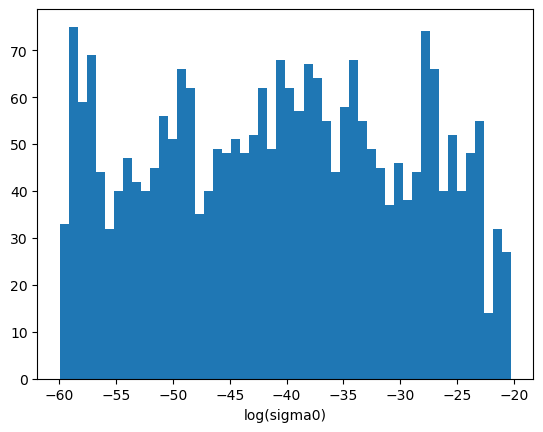

In [73]:
plt.hist(samples, bins=50)
plt.xlabel('log(sigma0)')

In [74]:
np.median(samples)

-40.25884118475045

In [75]:
"Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.acceptance_fraction))

'Mean acceptance fraction: 0.846'

In [85]:
from scipy.optimize import root
from cluster_functions import * 
p0=[-30, -4]
x0=1e-5 * u.GeV
root(funr, x0, args=(clusters[5], p0), method='lm').x

array([4.16127063e-23])

In [96]:
root(funr, x0, args=(clusters[5], p0), method='df-sane').x


array(0.10044863)

In [95]:
clusters[5].baryon_temp

<Quantity 8.20368656e-06 GeV>